# Predicting Used Car Prices

#### This notebook is a problem exercise on linear regression. The problem requires us to predict price of used cars based on the given data. The data can be downloaded from the parent directory of this notebook on my github.

#### In order to solve the present problem, we are:
- [x] Importing useful libraries
- [x] Importing Data
- [x] Filling in null values
- [x] Splitting data into training and test set
- [x] Analyzing Features
     1. plotting dependent variable with respect to independent variables
     2. choosing features based on p-value analysis(anova, f-statistic)
- [x] Cleaning Data
- [x] Designing the model(for the sake of modulation and reusability, the model has been saved in a different file called 'model.py' and imported from there as nn_model)
- [x] Training the model on data
- [x] Testing the model

### Importing useful Libraries...

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

import statistics
import scipy.stats as stats

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

import tensorflow
from keras.models import Sequential, Model
from keras.layers import Input, Dense, Activation, Dropout,BatchNormalization
from model import *

Using TensorFlow backend.


### Importing Data...

In [2]:
master_cars_df = pd.read_csv("./cars_price.csv")

In [3]:
cars_df = master_cars_df.copy()

In [4]:
cars_df.head()

,Unnamed: 0,make,model,priceUSD,year,condition,mileage(kilometers),fuel_type,volume(cm3),color,transmission,drive_unit,segment
0,0,honda,accord,565,1993,with mileage,960015.0,petrol,2000.0,black,mechanics,front-wheel drive,D
1,1,ford,fusion,5550,2008,with mileage,172000.0,diesel,1400.0,silver,mechanics,front-wheel drive,M
2,2,nissan,teana,8300,2008,with mileage,223000.0,petrol,2500.0,purple,auto,front-wheel drive,D
3,3,volkswagen,fox,3300,2005,with mileage,140000.0,petrol,1200.0,blue,mechanics,front-wheel drive,A
4,4,nissan,primera,2450,2002,with damage,413000.0,diesel,2200.0,burgundy,mechanics,front-wheel drive,D


In [5]:
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           40000 non-null  int64  
 1   make                 40000 non-null  object 
 2   model                40000 non-null  object 
 3   priceUSD             40000 non-null  int64  
 4   year                 40000 non-null  int64  
 5   condition            40000 non-null  object 
 6   mileage(kilometers)  40000 non-null  float64
 7   fuel_type            40000 non-null  object 
 8   volume(cm3)          39970 non-null  float64
 9   color                40000 non-null  object 
 10  transmission         40000 non-null  object 
 11  drive_unit           38655 non-null  object 
 12  segment              36245 non-null  object 
dtypes: float64(2), int64(3), object(8)
memory usage: 4.0+ MB


### Filling in Null Values...

In [6]:
#for categorical variables
def fill_in_cat(df, column):
    a = df[df[column].isnull()].index.tolist()
    for i in a:
        df[column][i] = statistics.mode(df[column])
    return df

cars_df = fill_in_cat(cars_df, 'drive_unit')
cars_df = fill_in_cat(cars_df, 'segment')

#filling in null values in volume(cm3)
l = cars_df[cars_df['volume(cm3)'].isnull()].index.tolist()
for i in l:
    cars_df['volume(cm3)'][i]=np.mean(cars_df['volume(cm3)'])

In [7]:
cars_df.nunique()

Unnamed: 0             40000
make                      93
model                    991
priceUSD                2510
year                      72
condition                  3
mileage(kilometers)     6392
fuel_type                  3
volume(cm3)              398
color                     13
transmission               2
drive_unit                 4
segment                    9
dtype: int64

In [8]:
cars_df.drop('Unnamed: 0', axis=1, inplace=True)

(array([3.7846e+04, 1.7400e+03, 2.8200e+02, 7.3000e+01, 3.4000e+01,
        9.0000e+00, 9.0000e+00, 2.0000e+00, 3.0000e+00, 2.0000e+00]),
 array([9.500000e+01, 1.958550e+04, 3.907600e+04, 5.856650e+04,
        7.805700e+04, 9.754750e+04, 1.170380e+05, 1.365285e+05,
        1.560190e+05, 1.755095e+05, 1.950000e+05]),
 <a list of 10 Patch objects>)

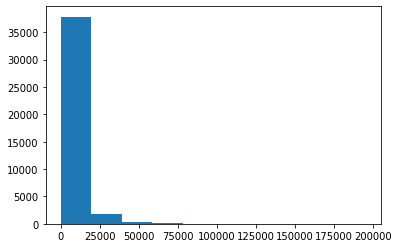

In [9]:
plt.hist(cars_df['priceUSD'])

### Splitting data into training and test set...

In [10]:
#splitting data into training and validation sets
def split(df, factor, dependent):
    train_df = df.iloc[:int(np.floor(len(df)*factor)),:]
    test_df = df.iloc[int(np.floor(len(df)*factor)):,:]
    X_train = train_df.drop(dependent, axis=1)
    Y_train = train_df[dependent]
    X_test = test_df.drop(dependent, axis=1)
    Y_test = test_df[dependent]
    return X_train, Y_train, X_test, Y_test

X_train, Y_train, X_test, Y_test = split(cars_df, 0.7, 'priceUSD')

### Feature analysis...

#### plotting dependent variable with respect to independent variables...

In [11]:
corr = np.abs(X_train.corrwith(Y_train)).sort_values(ascending=False)

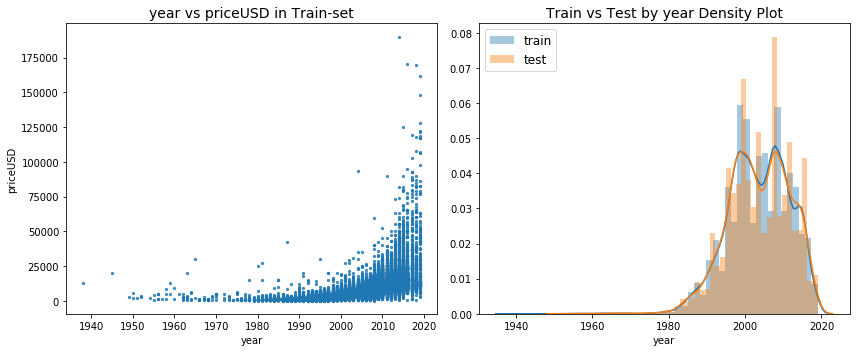

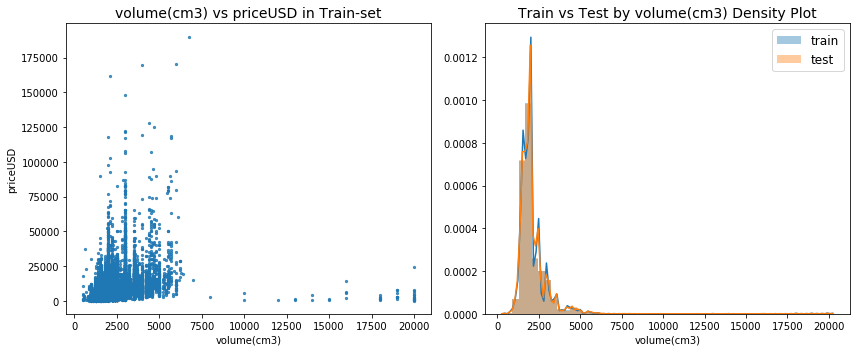

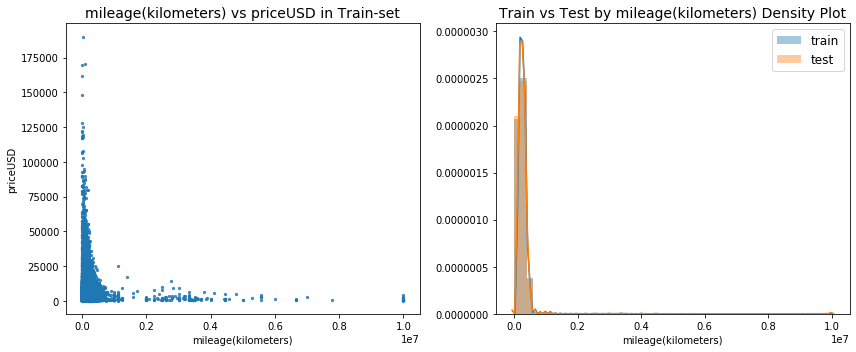

In [12]:
#plotting numeric features
def plot_num_col(var, dependent):
    
    fig, ax = plt.subplots(1, 2, figsize=(12,5))
    
    sns.regplot(x=X_train[var], y=Y_train, ax=ax[0], scatter_kws={'s':5}, fit_reg=False)
    ax[0].set_title("%s vs %s in Train-set" % (var, dependent), size=14)
    
    sns.distplot(X_train[var].dropna(), label="train", ax=ax[1])
    sns.distplot(X_test[var].dropna(), label="test", ax=ax[1])

    fig.tight_layout()
    ax[1].legend(prop={'size': 12})
    ax[1].set_title("Train vs Test by %s Density Plot" % var, size=14)
    
for col in corr.index[:10]:
    plot_num_col(col,'priceUSD')

In [13]:
#categorical columns
cat_cols = []
for idx, col in enumerate(cars_df.dtypes):
    if col == 'object':
        cat_cols.append(cars_df.dtypes.index[idx])

In [14]:
#plotting categorical features
def plot_cat_col(var):
    
    fig, ax = plt.subplots(1, 2, figsize=(15,5))
    
    indat = pd.DataFrame({'priceUSD': Y_train, '%s' % var: X_train[var]})
    means = indat.groupby(['%s' % var])['priceUSD'].mean()\
    .sort_values(ascending=False)
    if len(means) > 20:
        means = means.iloc[:20]
    sns.barplot(x=means.index, y=means, ax=ax[0])

    ax[0].set_title("Average priceUSD by %s" % var, size=14)
    for item in ax[0].get_xticklabels():
        item.set_rotation(90)
    
    var_dist_trn = X_train[var].value_counts()
    var_dist_trn = var_dist_trn / len(X_train)
    var_dist_tst = X_test[var].value_counts()
    var_dist_tst = var_dist_tst / len(X_test)

    df_join = var_dist_trn.to_frame().join(var_dist_tst.to_frame(), \
                                           lsuffix='_1', rsuffix='_2')\
    .reset_index()
    df_join.columns = [var, 'train', 'val']
    df_join = df_join[df_join[var].isin(means.index) ]
    df_join = pd.melt(df_join, id_vars=var, var_name="data", \
                      value_name="distribution")
    df_join.sort_values(by=["data","distribution"], \
                        ascending=[True,False], inplace=True)

    sns.barplot(x=var, y="distribution", hue="data", \
                data=df_join, order= means.index, ax=ax[1])
    ax[1].legend(loc='upper right', prop={'size': 12})
    ax[1].set_title("Train vs test  Distribution by %s" % var, size=14)
    for item in ax[1].get_xticklabels():
        item.set_rotation(90)

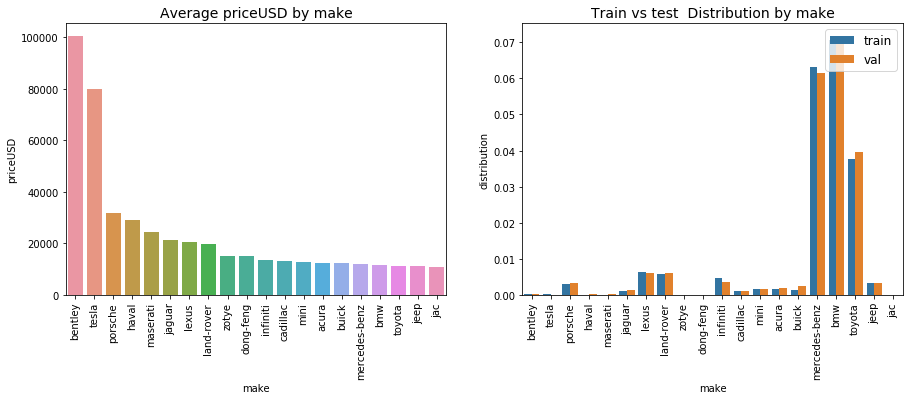

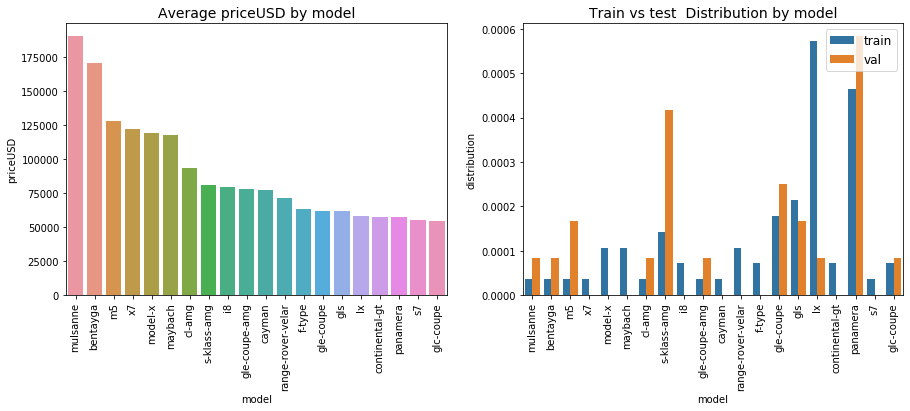

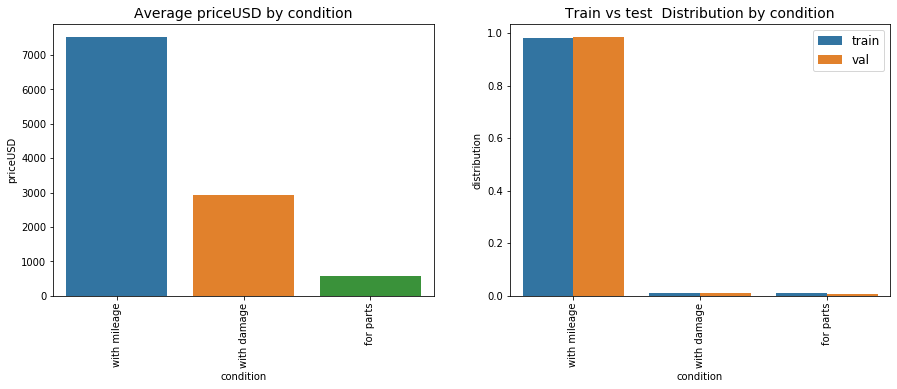

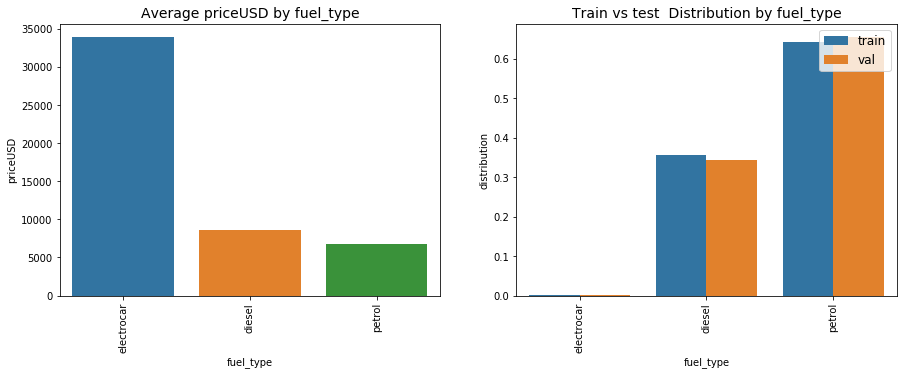

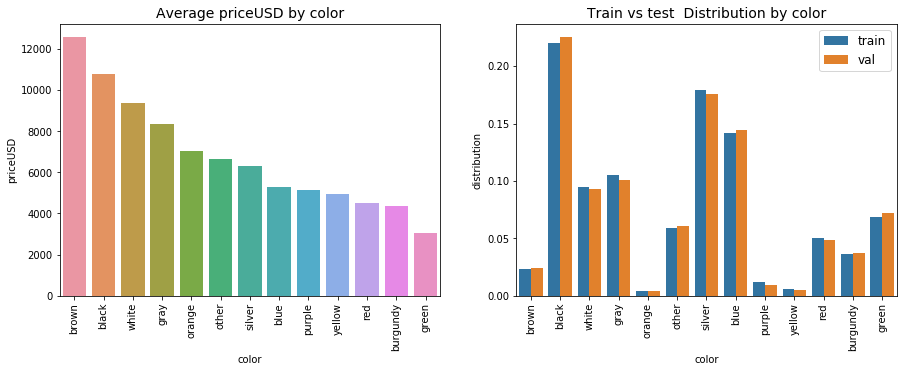

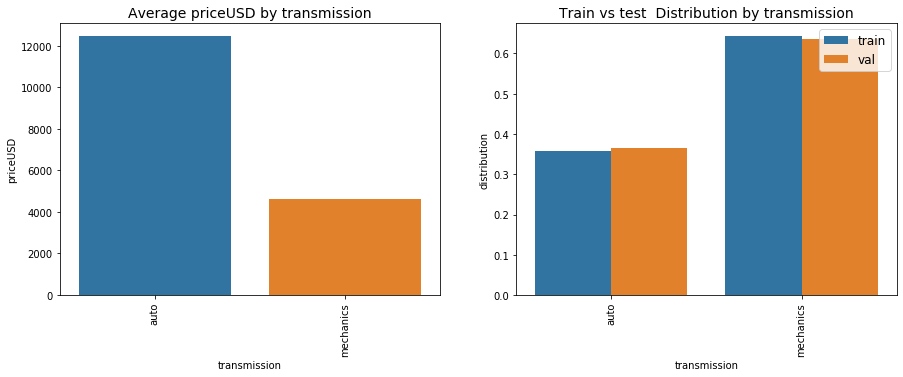

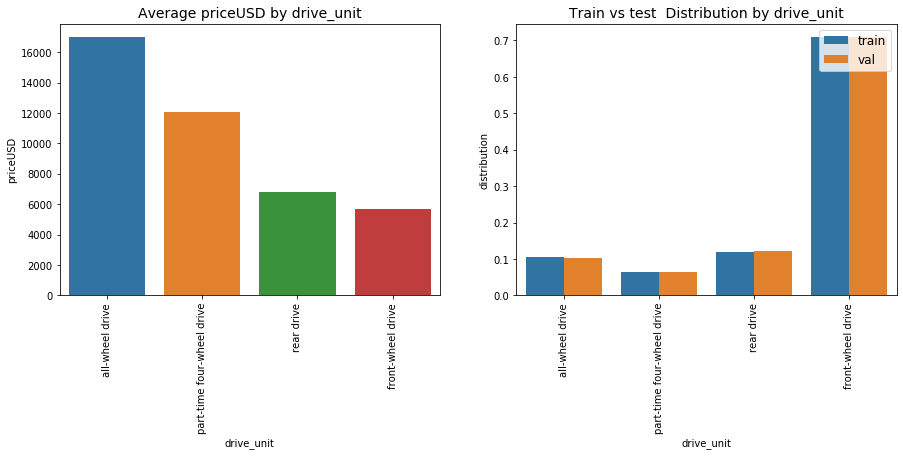

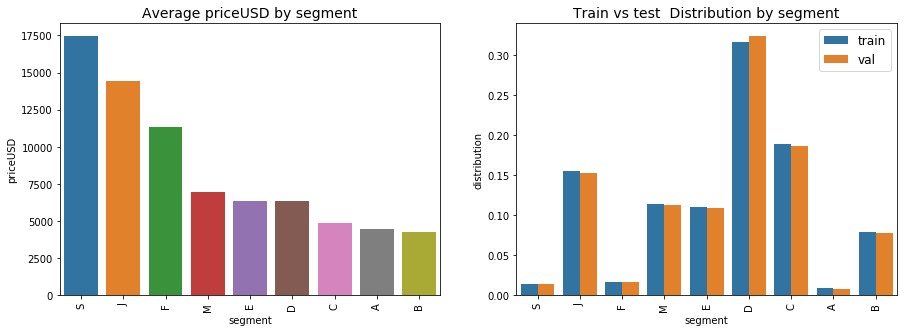

In [15]:
for col in cat_cols[:10]:
    plot_cat_col(col)

Text(0.5, 1.0, 'Correlation coefficient on priceUSD and columns')

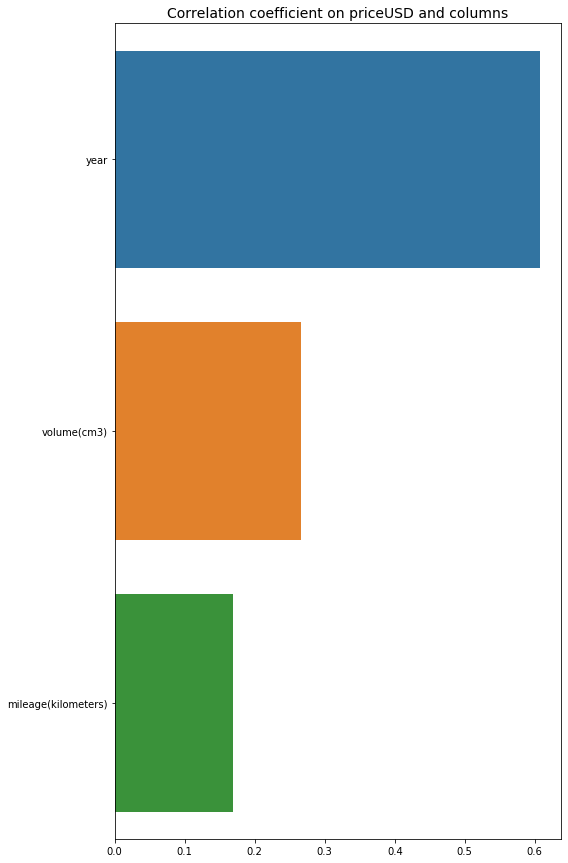

In [16]:
#Correlation between priceUSD and numeric features

pd.options.display.float_format = '{:.4f}'.format
plt.figure(figsize=(8,15))
ax = sns.barplot(x=corr[:40], y=corr.index[:40])
plt.title('Correlation coefficient on priceUSD and columns', fontsize=14)

#### choosing features based on p-value analysis(anova, f-statistic)...

In [17]:
#One-way ANOVA on Categorical Features against priceUSD

import statsmodels.api as sm
from statsmodels.formula.api import ols

f=[];p=[]

for col in cat_cols:
    
    #Normalizing priceUSD before finding Anova statistic
    indat = pd.DataFrame({'log_priceUSD': np.log(Y_train), 'cat_col': X_train[col]})
    model = ols('log_priceUSD ~ C(cat_col)', data=indat).fit()
    anova_table = sm.stats.anova_lm(model, typ=2)
    f.append(anova_table.iloc[0, 2])
    p.append(anova_table.iloc[0, 3])

In [18]:
#f_statistic and p-values
print('cat_cols{}\nf-statistic:{}\np-values:{}'.format(cat_cols,f,p))

cat_cols['make', 'model', 'condition', 'fuel_type', 'color', 'transmission', 'drive_unit', 'segment']
f-statistic:[82.52633363956635, 56.504791295275055, 886.5912248168703, 484.66912963137065, 440.6205816187925, 9966.855282483133, 1728.5295127925986, 862.8847354554331]
p-values:[0.0, 0.0, 0.0, 1.1824000431136999e-207, 0.0, 0.0, 0.0, 0.0]


Text(0.5, 1.0, 'ANOVA F-values on priceUSD')

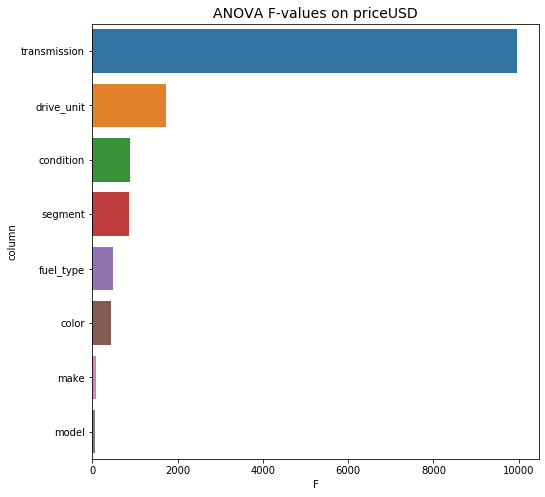

In [19]:
#p-values are very low, i.e. there is strong dependence on categorical variables

anova = pd.DataFrame({'column': cat_cols, 'F': f, 'p':p})
anova = anova.sort_values(by=['F'], ascending=False)\
.reset_index(drop=True)

plt.figure(figsize=(8,8))
ax = sns.barplot(x=anova.F, y=anova.column)
plt.title('ANOVA F-values on priceUSD', fontsize=14)

In [20]:
#Kruskal Wellis H-test for non-normal distribution
H=[]
P=[]
for col in cat_cols:
    l=[]
    var = X_train[col].unique()
    for x in var:
        l.append(Y_train[X_train[col]==x])
    h,hp = stats.kruskal(*l)
    H.append(h)
    P.append(hp)

In [21]:
#h_statistic and p-values
print('cat_cols{}\nh-statistic:{}\np-values:{}'.format(cat_cols,H,P))

cat_cols['make', 'model', 'condition', 'fuel_type', 'color', 'transmission', 'drive_unit', 'segment']
h-statistic:[5629.925784084864, 18417.24475713334, 873.7166490992678, 807.0316792239431, 4951.414733985335, 7987.025234426031, 4649.246921448059, 5935.550298071886]
p-values:[0.0, 0.0, 1.8829564458848164e-190, 5.692427341534312e-176, 0.0, 0.0, 0.0, 0.0]


Text(0.5, 1.0, 'KRUSKAL H-values on priceUSD')

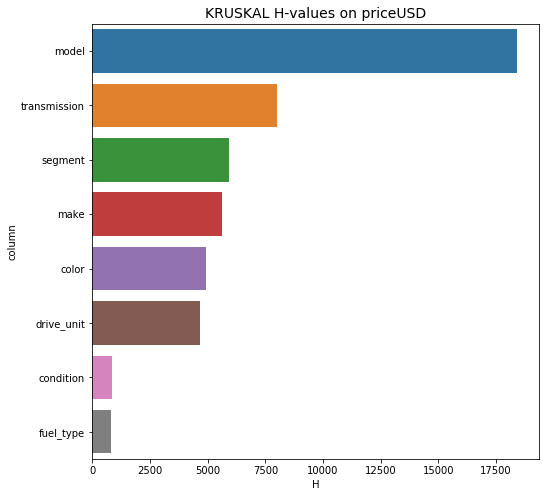

In [22]:
#p-values are still very low indicating strong dependence

kruskal = pd.DataFrame({'column': cat_cols, 'H':H, 'P':P})
kruskal = kruskal.sort_values(by=['H'], ascending=False)\
.reset_index(drop=True)

plt.figure(figsize=(8,8))
ax = sns.barplot(x=kruskal.H, y=kruskal.column)
plt.title('KRUSKAL H-values on priceUSD', fontsize=14)

### Data Cleaning...

In [23]:
#removing model to make our more general purpose. The feature 'model' is too data-specific.
cat_cols.remove('model')
num_cols = list(corr.index)

In [24]:
def normalize(col_data):
    max, min = col_data.max(), col_data.min()
    return np.array((col_data - min) / (max - min), dtype=np.float64), max, min

In [25]:
def split_and_encode_data(df, cat_cols, num_cols, factor=0.7):
    
    a = np.zeros((len(df), 1))
    for col in num_cols:
        a1, mx, mn = normalize(df[col])
        a1= a1.reshape(len(a1), 1)
        a = np.concatenate((a, a1), axis = 1)
        
    label_encoder = LabelEncoder()
    onehot_encoder = OneHotEncoder(sparse=False)
    
    for col in cat_cols:         
        integer_encoded = label_encoder.fit_transform(df[col])
        integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
        onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
        a = np.concatenate((a, onehot_encoded), axis = 1)
        
    train = a[:int(np.floor(a.shape[0]*factor)),:]
    test = a[int(np.floor(a.shape[0]*factor)):,:]
    return train, test

In [26]:
train_data, test_data = split_and_encode_data(cars_df, cat_cols, num_cols)


In [27]:
print(train_data.shape, test_data.shape)

(28000, 131) (12000, 131)


### Designing the model...

In [28]:
model = nn_model(train_data.shape[1])

model.compile(loss='mean_absolute_error', optimizer='SGD')

### Training the model on data...

In [29]:
history=model.fit(train_data, Y_train, epochs=15, batch_size=128, validation_split=0.3)


Train on 19600 samples, validate on 8400 samples
Epoch 1/15
19600/19600 [==============================] - 3s 168us/step - loss: 7368.9703 - val_loss: 7515.0261
Epoch 2/15
19600/19600 [==============================] - 2s 107us/step - loss: 7248.4823 - val_loss: 7182.8224
Epoch 3/15
19600/19600 [==============================] - 3s 134us/step - loss: 5830.3911 - val_loss: 4400.6619
Epoch 4/15
19600/19600 [==============================] - 3s 134us/step - loss: 3022.2855 - val_loss: 23142.7307
Epoch 5/15
19600/19600 [==============================] - 3s 131us/step - loss: 2432.7548 - val_loss: 12468.8635
Epoch 6/15
19600/19600 [==============================] - 3s 138us/step - loss: 2269.7103 - val_loss: 7359.2652
Epoch 7/15
19600/19600 [==============================] - 3s 139us/step - loss: 2166.0006 - val_loss: 4601.6586
Epoch 8/15
19600/19600 [==============================] - 3s 131us/step - loss: 2114.4729 - val_loss: 3756.6473
Epoch 9/15
19600/19600 [============================

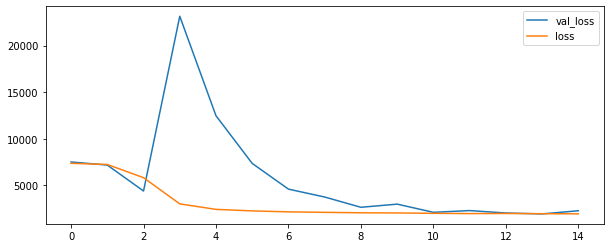

In [30]:
fig, ax = plt.subplots(1, 1, figsize=(10,4))
epochs = np.arange(len(history.history['loss']))
ax.plot(epochs, history.history['val_loss'], label='val_loss')
ax.plot(epochs, history.history['loss'], label = 'loss')
plt.legend()

### Testing the model...

In [31]:
Y_test = (np.array(Y_test).reshape(len(Y_test), 1))
predictions = model.predict(test_data)

diff = predictions - Y_test

y = np.concatenate((Y_test, predictions, diff), axis = 1)

In [32]:
print('  Y_test\t   predictions\t   difference\n\n', y[:20])

  Y_test	   predictions	   difference

 [[ 2614.          5595.29785156  2981.29785156]
 [ 5500.          5381.77832031  -118.22167969]
 [16500.          8619.14453125 -7880.85546875]
 [ 2290.          3324.6809082   1034.6809082 ]
 [ 3500.          4026.86474609   526.86474609]
 [ 6200.          6869.37890625   669.37890625]
 [ 6200.          7914.87988281  1714.87988281]
 [ 5550.          5407.8203125   -142.1796875 ]
 [ 1150.          1957.19018555   807.19018555]
 [ 1680.          1194.80041504  -485.19958496]
 [ 3430.          4623.85058594  1193.85058594]
 [ 7487.         15808.74609375  8321.74609375]
 [ 1800.          2958.27807617  1158.27807617]
 [ 5650.          6400.75585938   750.75585938]
 [ 2050.          4896.68164062  2846.68164062]
 [ 7500.          7785.47460938   285.47460938]
 [ 4599.          5630.84375     1031.84375   ]
 [  903.          1301.5748291    398.5748291 ]
 [ 8000.          8729.85546875   729.85546875]
 [ 1000.          1820.27050781   820.27050781]]

In [33]:
rms = np.sqrt(np.sum(diff*diff)/len(diff))

In [34]:
print('root averaged square of errors: {}'.format(rms))

root averaged square of errors: 4579.466112132311
